In [2]:
import numpy as numpy
import pandas as pd
import seaborn as sns


In [3]:
iris_data = pd.read_csv('irisdata.csv')
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
columns_name = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'class']
iris_data.columns = columns_name
iris_data.head()

,Sepal length,Sepal width,Petal length,Petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
iris_data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
class           0
dtype: int64

In [6]:
iris_data.value_counts("class")

class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

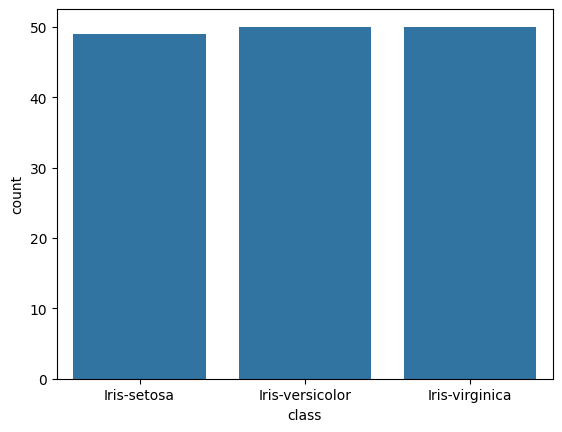

In [7]:
sns.countplot(x= 'class', data = iris_data)

[Text(0.5, 1.0, 'Sepal length and Sepal Width')]

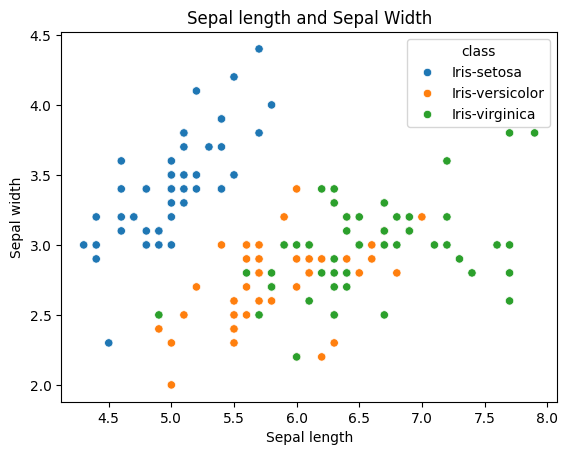

In [8]:
figl = sns.scatterplot(x='Sepal length', y='Sepal width',hue='class', data= iris_data)
figl.set(title='Sepal length and Sepal Width')

[Text(0.5, 1.0, 'Petal Length and Petal Width')]

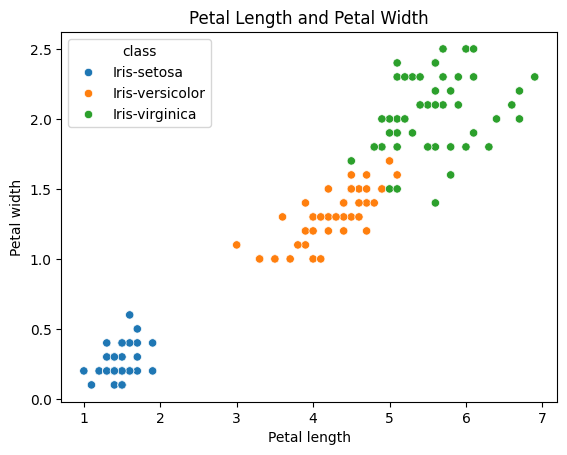

In [9]:
fig2 = sns.scatterplot(x='Petal length', y='Petal width', hue='class', data=iris_data)
fig2.set(title='Petal Length and Petal Width')

In [10]:
features = iris_data.iloc[:, 0:4]
label = iris_data.iloc[:, 4]
print("features : ")
print(features)
print("Label : ")
print(label)

features : 
     Sepal length  Sepal width  Petal length  Petal width
0             4.9          3.0           1.4          0.2
1             4.7          3.2           1.3          0.2
2             4.6          3.1           1.5          0.2
3             5.0          3.6           1.4          0.2
4             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
144           6.7          3.0           5.2          2.3
145           6.3          2.5           5.0          1.9
146           6.5          3.0           5.2          2.0
147           6.2          3.4           5.4          2.3
148           5.9          3.0           5.1          1.8

[149 rows x 4 columns]
Label : 
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: class, Leng

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print('Jumlah data train', X_train.shape[0])
print('Jumlah data test', y_test.shape[0])

Jumlah data train 119
Jumlah data test 30


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 10, weights="distance")
knn.fit(X_train, y_train)

train_acc = knn.score(X_train, y_train)

print("The accuracy of KNN classififier on training data id :  {:.3f}".format(train_acc))

The accuracy of KNN classififier on training data id :  1.000


CONFUSION MATRIX
Confusion Matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya.

Text(0.5, 1.0, 'Confusion Matrix')

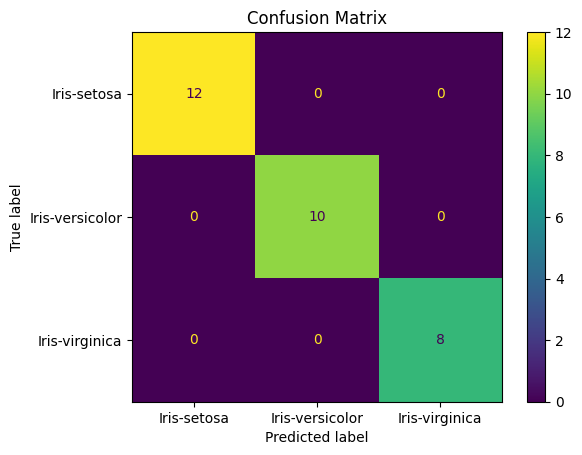

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay .from_estimator(knn, X_test, y_test)
disp.ax_.set_title("Confusion Matrix")

PARAMETER TUNING

In [14]:
from subprocess import check_output
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [15]:
data = pd.read_csv('irisdata.csv')
features = data.iloc[:, 0:4]
label = data.iloc[:, 4]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
n_range = list(range(1, 10))
weight_list = ['uniform', 'distance']
param_grid = {"n_neighbors" : n_range, "weights" : weight_list}

grid = GridSearchCV(estimator= KNeighborsClassifier(),
                    param_grid = param_grid,
                    cv = 3,
                    scoring= 'accuracy',
                    refit = True)

knn_model = make_pipeline(preprocessing.StandardScaler(), grid)
knn_model.fit(features, label)
print("Accuracy of the tuned model: %.4f" %grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model: 0.9665
{'n_neighbors': 6, 'weights': 'distance'}


In [17]:
import pickle
with open('knn_model.pickle', 'wb')as f:
    pickle.dump(knn_model, f)

In [18]:
# Load the model
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)

# Predict new data
new_data =[5.7, 3.2, 4.4, 0.2]
X= numpy.array([new_data])
prediction = model.predict(X)
print("PRediction of Species: {}".format(prediction) )

PRediction of Species: ['Iris-versicolor']


c:\Users\Ranadi Wijaya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
